In [82]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

f)

In [83]:
th = 10
N = 100

sample = np.array([th*(random()+1) for i in range(N)])

sample


array([16.43886751, 10.95441661, 14.84549271, 17.70629238, 19.70098955,
       16.48021088, 11.61560932, 15.58994584, 16.06153889, 12.22921618,
       10.08620072, 13.67720737, 14.38528474, 11.52501823, 10.32620108,
       14.54907856, 18.90793751, 13.4536492 , 17.99808156, 17.18149633,
       16.74272724, 13.54085582, 16.68651394, 13.75879641, 19.1287288 ,
       18.11646232, 19.76003875, 10.61298106, 13.63575252, 19.76334405,
       18.14031884, 11.36600427, 19.5873837 , 14.03858605, 17.37622565,
       13.50271853, 16.96678787, 14.77470079, 11.19194456, 11.02375621,
       13.11011189, 16.55664809, 12.46007317, 13.35191956, 14.42365574,
       13.98892591, 12.55824303, 17.32393858, 15.13281911, 16.61111561,
       19.39512091, 10.29383038, 13.27794711, 19.8819428 , 16.44894636,
       19.85542073, 12.55680699, 12.73457277, 19.61954713, 16.16949547,
       11.05985315, 11.2791681 , 14.38503742, 14.3527093 , 19.27687774,
       15.72850307, 15.27663098, 16.03089449, 17.55557581, 15.32

In [84]:
b = 0.95

xm = np.max(sample)

lb = xm / (1+ ((1+ b)/2) ** (1/N))
ub = xm / (1+ ((1- b)/2) ** (1/N))
toch = (lb, ub)
print(f'Точный доверительный интервал: ({lb}, {ub})')

Точный доверительный интервал: (10.001130658553478, 10.18428535147021)


In [85]:
th1 = 2/3 * np.mean(sample)

s = np.sqrt(np.sum([(x - np.mean(sample))**2 for x in sample]) /(N-1))

lb = th1 - 2*s*1.96*np.sqrt(N-1)/ (3*N)
ub = th1 + 2*s*1.96*np.sqrt(N-1)/ (3*N)
asymp = (lb, ub)
print(f'Асимптотический доверительный интервал: ({lb}, {ub})')

Асимптотический доверительный интервал: (9.917554434314592, 10.639547967687175)


g)

In [86]:
n = 10000

h = (N+1)* xm / (2*N+1)

bootstrap = []

for i in range(n):
    choice = np.random.choice(sample, size=N)
    bootstrap.append((N+1) * np.max(choice) / (2*N+1) - h)

sorted_bootstrap = np.sort(bootstrap)

t1 = sorted_bootstrap[int((1-b) * n / 2)]
t2 = sorted_bootstrap[int((1+b) * n / 2)]

lb = h - t2
ub = h - t1
bs = (lb, ub)
print(f'Бутстраповский доверительный интервал: ({lb}, {ub})')

Бутстраповский доверительный интервал: (10.04961535634876, 10.122128755047626)


h)

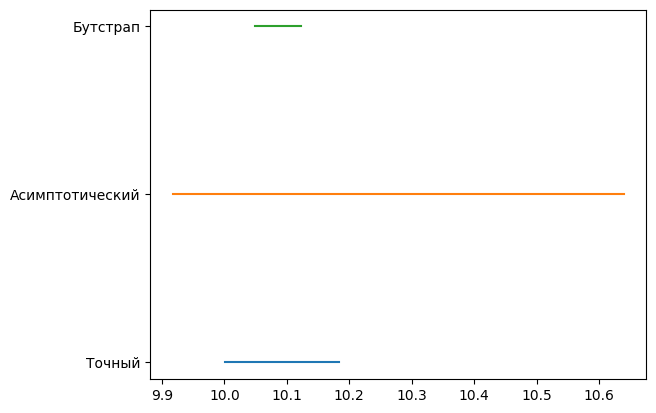

In [87]:
for i, di in enumerate([toch, asymp, bs]):
    plt.plot((di[0], di[1]),(i,i))

_ = plt.yticks(range(3), ["Точный", "Асимптотический", "Бутстрап"])